Введение:

В современном мире финансовых инвестиций, где данные становятся все более объемными и сложными, применение методов машинного обучения играет ключевую роль в принятии обоснованных финансовых решений. Одной из ключевых задач в этой области является оценка активов, таких как ценные бумаги, валюты, товары и другие финансовые инструменты.

Машинное обучение предоставляет инвесторам и трейдерам мощный инструментарий для анализа рынков и прогнозирования цен активов на основе больших объемов данных. Это позволяет улучшить качество инвестиционных решений и минимизировать риски.

В данном исследовании мы сосредоточимся на применении методов машинного обучения в задачах оценки активов, в частности, на прогнозировании цен акций компаний. Мы будем использовать доступные финансовые данные, включая временные ряды цен акций, объемы торгов и другие характеристики, чтобы разработать модели, способные предсказывать будущие цены активов с высокой точностью.

Целью данного исследования является не только построение точных моделей прогнозирования, но и исследование различных методов и подходов к решению задачи оценки активов с использованием машинного обучения. Мы также обсудим перспективы и ограничения применения этих методов в реальном мире и возможные направления для будущих исследований.

Таким образом, наше исследование будет способствовать лучшему пониманию роли и эффективности машинного обучения в финансовой сфере и поможет инвесторам и трейдерам принимать более обоснованные решения на рынке активов.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Описание набора данных:
Набор данных представляет собой временной ряд, содержащий информацию о ценах акций компании Amazon за период с 8 февраля 2013 года по 7 февраля 2018 года. Каждая запись включает в себя следующие атрибуты:

Date (Дата): Дата торгового дня.
Open (Цена открытия): Цена акции в начале торгов.
High (Максимальная цена): Самая высокая цена акции за торговый день.
Low (Минимальная цена): Самая низкая цена акции за торговый день.
Close (Цена закрытия): Цена акции в конце торгов.
Volume (Объем торгов): Количество акций, проданных за торговый день.
Name (Название): Идентификатор компании (в данном случае "AMZN" для Amazon).
Решаемая задача:
Целью данного исследования является прогнозирование будущих цен акций Amazon на основе имеющихся данных о ценах акций и объемах торгов. Это важная задача в области финансового анализа, поскольку точный прогноз цен акций может помочь инвесторам и трейдерам принимать обоснованные решения о покупке, продаже или удержании акций. Для достижения этой цели будет использоваться анализ временных рядов и методы машинного обучения.

In [2]:
data_amazon = pd.read_csv('AMZN_data.csv')
data_amazon

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


In [3]:
# Вывод информации о количественных характеристиках датасета
print("Количество записей в датасете:", len(data_amazon))
print("Статистика по количественным признакам:")
print(data_amazon.describe())

# Проверка на отсутствующие значения
print("\nИнформация об отсутствующих значениях:")
print(data_amazon.isnull().sum())

# Вывод информации о характеристиках и физическом смысле каждого атрибута данных
print("\nИнформация о структуре данных:")
print(data_amazon.info())

# Преобразование столбца "Date" в формат даты
data_amazon["date"] = pd.to_datetime(data_amazon["date"])

Количество записей в датасете: 1259
Статистика по количественным признакам:
              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    576.867264   582.017221   571.113517   576.880041  3.730465e+06
std     282.500019   284.417123   280.215237   282.500395  2.166506e+06
min     248.940000   252.930000   245.750000   248.230000  1.092970e+06
25%     325.870000   329.485000   322.185000   325.800000  2.511165e+06
50%     506.000000   512.330000   495.640000   503.820000  3.144719e+06
75%     777.620000   781.845000   770.720000   777.420000  4.220246e+06
max    1477.390000  1498.000000  1450.040000  1450.890000  2.385606e+07

Информация об отсутствующих значениях:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 

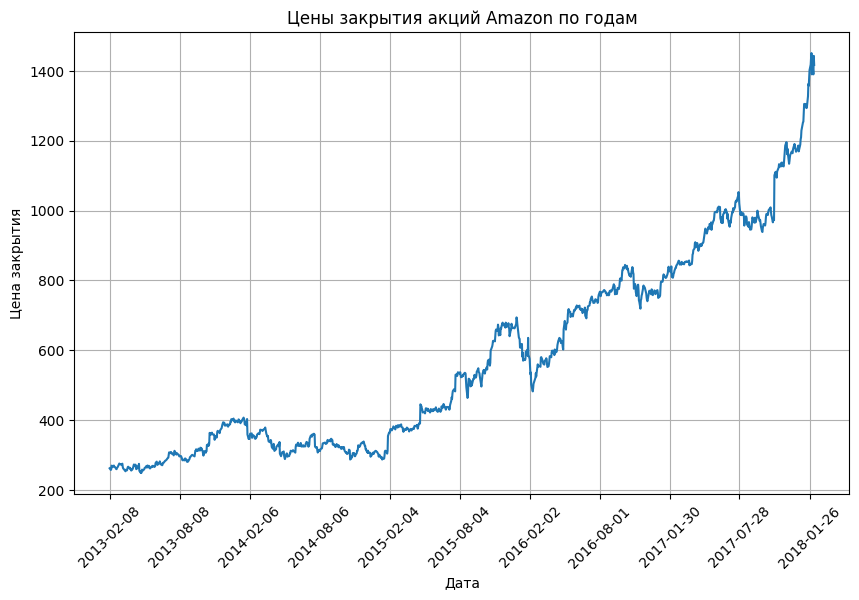

In [4]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(data_amazon["date"], data_amazon["close"])
plt.title("Цены закрытия акций Amazon по годам")
plt.xlabel("Дата")
plt.ylabel("Цена закрытия")
plt.grid(True)
plt.xticks(data_amazon["date"][::int(len(data_amazon)/10)], rotation=45) 
plt.show()

In [5]:
data_amazon = pd.get_dummies(data_amazon, columns=['Name'])

In [6]:
data_amazon.head()

,date,open,high,low,close,volume,Name_AMZN
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,True
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,True
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,True
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,True
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,True


Определение шкалы измерения каждого признака:

Date (Дата) - категориальный признак

Open (Цена открытия) - количественный признак 

High (Максимальная цена) - количественный признак 

Low (Минимальная цена) - количественный признак 

Close (Цена закрытия) - количественный признак 

Volume (Объем торгов) - количественный признак 

Name (Название) - категориальный признакальный признакальный признак признак

In [8]:
# Функция для выявления аномальных значений по стандартному отклонению
def find_outliers_std(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Список количественных признаков
numeric_features = ['open', 'high', 'low', 'close', 'volume']

# Вывод аномальных значений для каждого количественного признака
for feature in numeric_features:
    outliers = find_outliers_std(data_amazon, feature)
    print(f"Аномальные значения для признака {feature}:\n{outliers}")

# Удаление аномальных значений для каждого количественного признака
for feature in numeric_features:
    data_amazon = remove_outliers_std(data_amazon, feature)

# Вывести обновленные данные без аномальных значений
print("\nОбновленные данные без аномальных значений:")
print(data_amazon.head())


Аномальные значения для признака open:
           date     open     high      low    close    volume  Name_AMZN
1253 2018-01-31  1451.30  1472.58  1450.04  1450.89   6424693       True
1254 2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808       True
1255 2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722       True
1258 2018-02-07  1449.00  1460.99  1415.15  1416.78   7162741       True
Аномальные значения для признака high:
           date     open     high      low    close    volume  Name_AMZN
1252 2018-01-30  1403.17  1439.25  1392.00  1437.82   5871942       True
1253 2018-01-31  1451.30  1472.58  1450.04  1450.89   6424693       True
1254 2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808       True
1255 2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722       True
1256 2018-02-05  1402.62  1458.98  1320.72  1390.00  11494985       True
1257 2018-02-06  1361.46  1443.99  1351.79  1442.84  11066819       True
1258 2018-02-07  1449.00  1460.99  1415.15  14

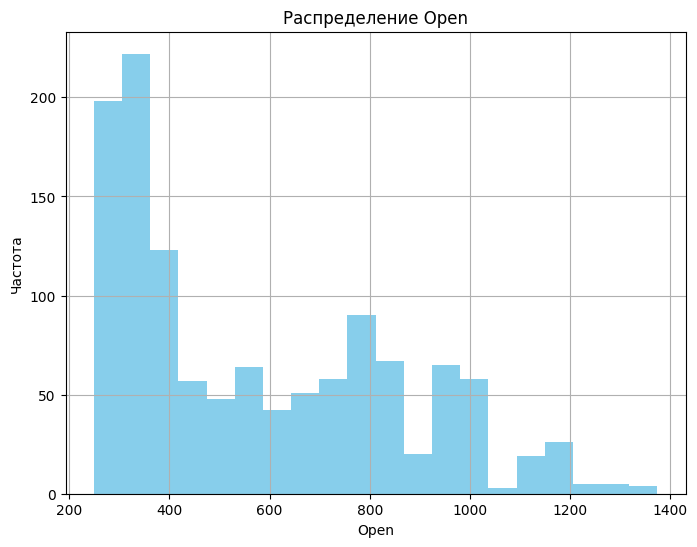

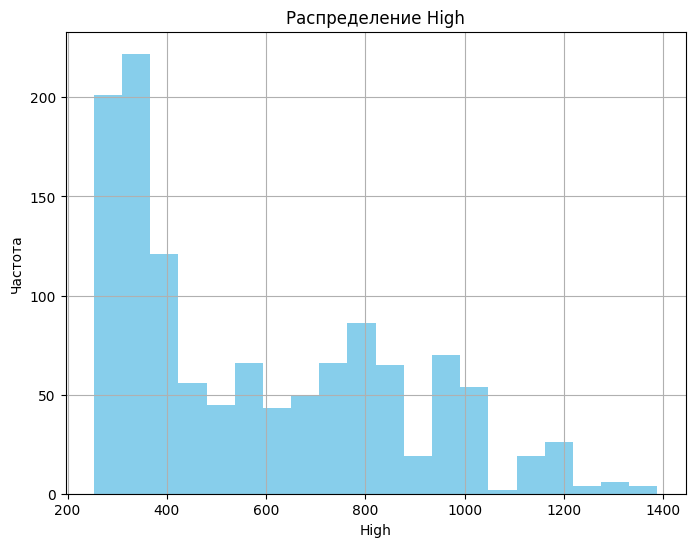

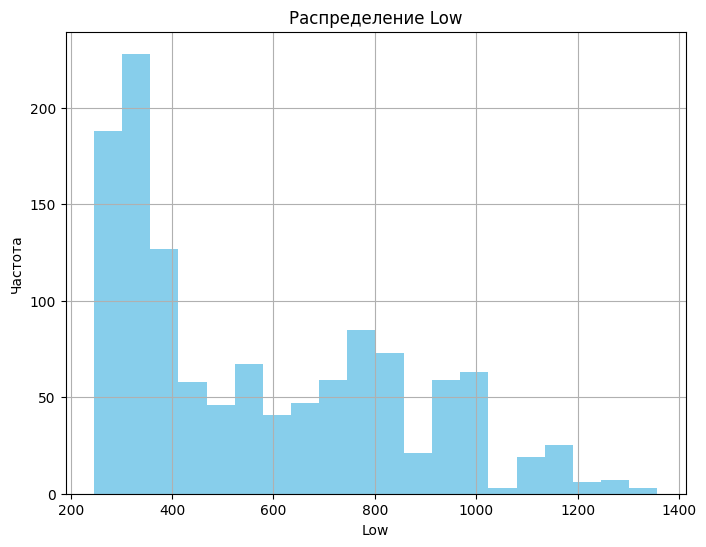

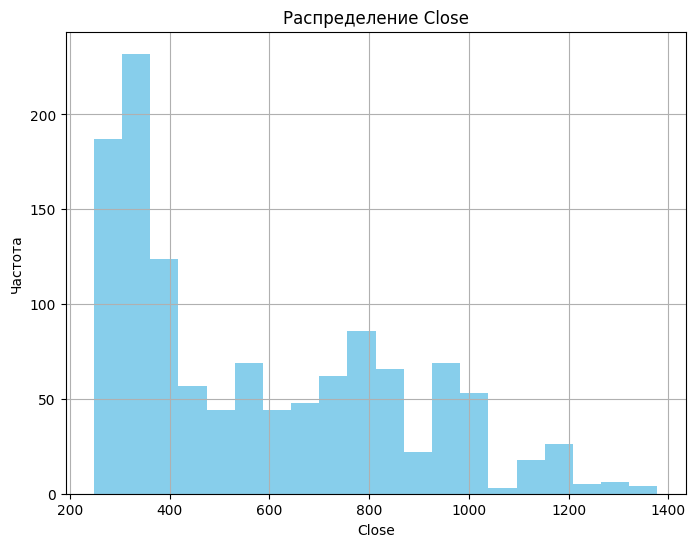

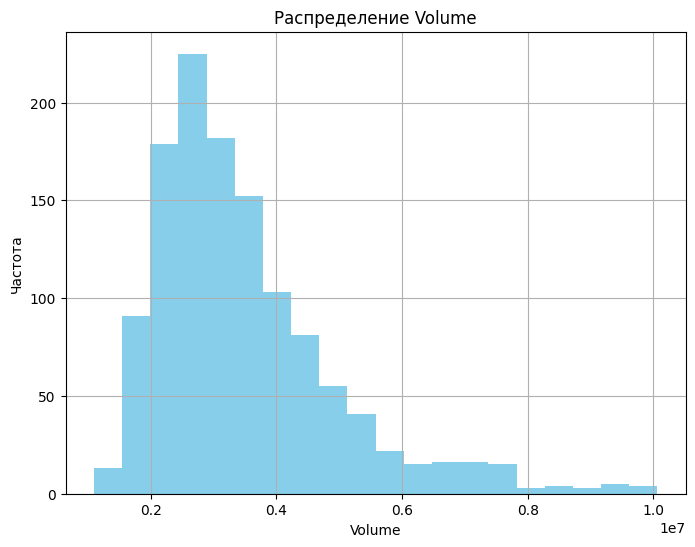

In [9]:
# Гистограммы для количественных признаков
numeric_features = ['open', 'high', 'low', 'close', 'volume']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.hist(data_amazon[feature], bins=20, color='skyblue')
    plt.title(f'Распределение {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()




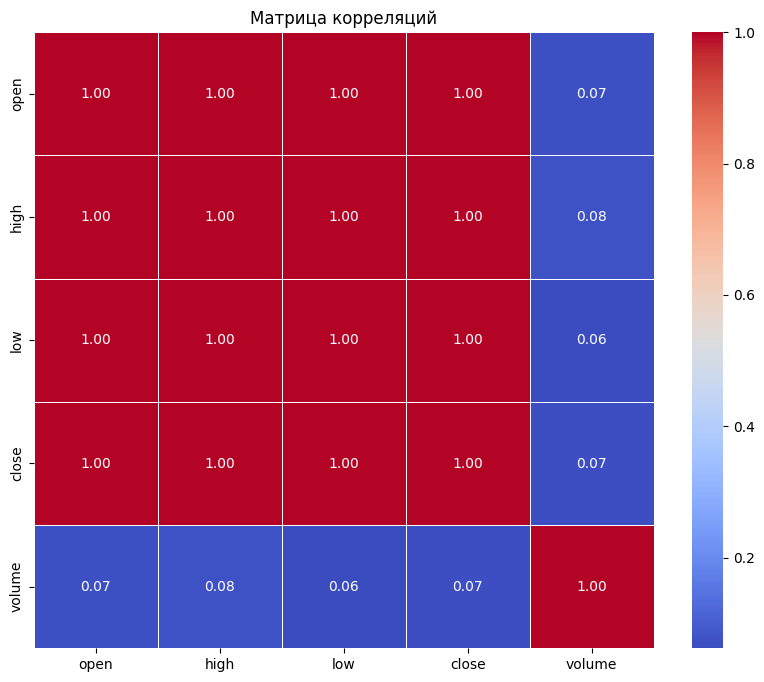

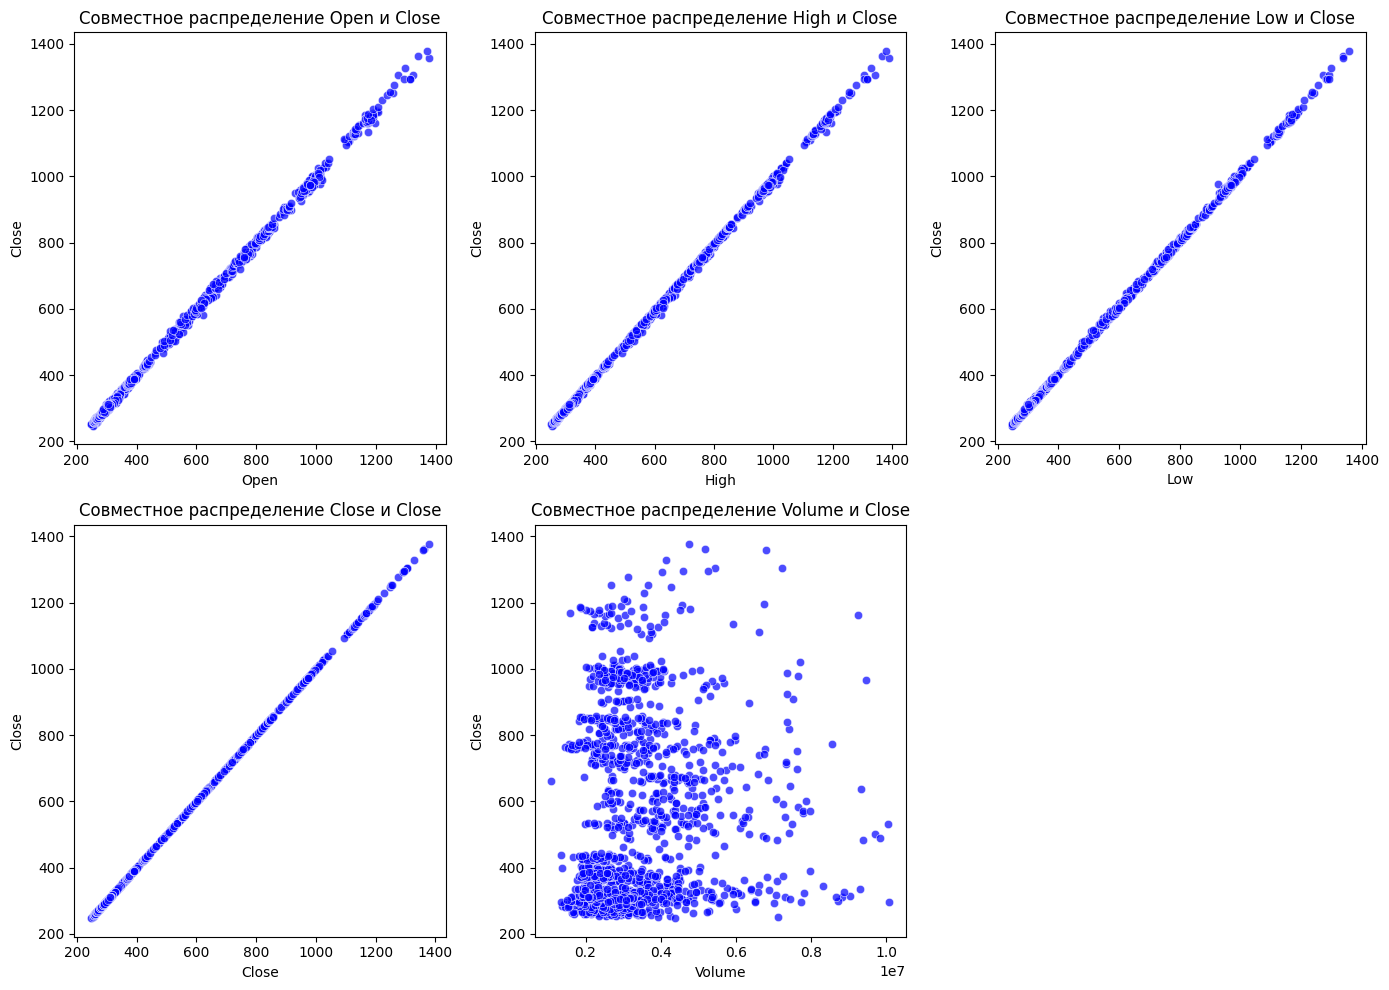

In [10]:
import seaborn as sns

# Матрица корреляций для количественных признаков
corr_matrix = data_amazon[['open', 'high', 'low', 'close', 'volume']].corr()

# Построение кореллограммы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

# Совместные распределения каждого признака с целевой переменной
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='close', data=data_amazon, color='blue', alpha=0.7)
    plt.title(f'Совместное распределение {feature.capitalize()} и Close')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Close')
plt.tight_layout()
plt.show()


In [11]:
# Установим пороговое значение для корреляции
threshold = 0.7

# Выявление коррелированных признаков
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Коррелированные признаки:", correlated_features)

# Признаки, не несущие информации для данной задачи
irrelevant_features = set()
for col in corr_matrix.columns:
    if abs(corr_matrix['close'][col]) < threshold:
        irrelevant_features.add(col)

print("Признаки, не несущие информации для данной задачи:", irrelevant_features)

Коррелированные признаки: {'close', 'high', 'low'}
Признаки, не несущие информации для данной задачи: {'volume'}


In [12]:
# Выбираем количество кластеров (можно использовать метод локтя или силуэт для выбора оптимального значения)
n_clusters = 3

# Выбираем признаки для кластеризации (для примера, возьмем колонки 'open' и 'close')
X = data_amazon[['open', 'close']]

# Применяем K-means к данным
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Получаем метки кластеров для каждого наблюдения
cluster_labels = kmeans.labels_

# Выводим метки кластеров
print("Метки кластеров для каждого наблюдения:")
print(cluster_labels)

# Выводим центры кластеров
print("\nЦентры кластеров:")
print(kmeans.cluster_centers_)


Метки кластеров для каждого наблюдения:
[0 0 0 ... 1 1 1]

Центры кластеров:
[[ 340.7813638   340.87395694]
 [1032.2076699  1032.09975728]
 [ 698.30788265  698.49869898]]


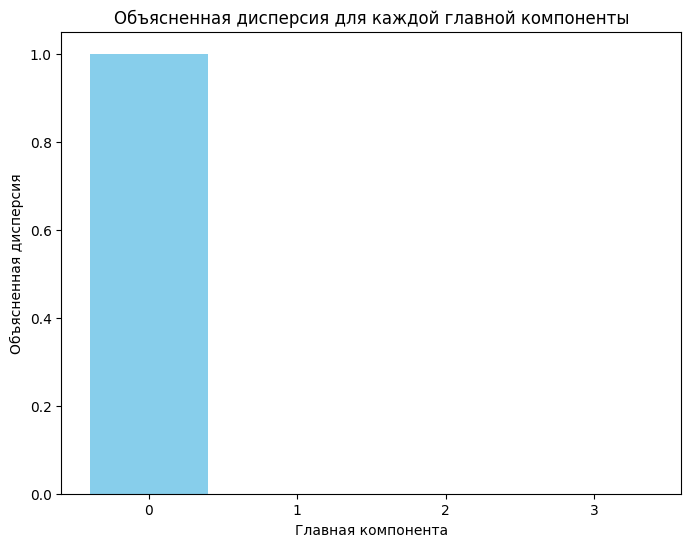

Объясненная дисперсия для каждой главной компоненты:
Главная компонента 1: 1.00
Главная компонента 2: 0.00
Главная компонента 3: 0.00
Главная компонента 4: 0.00


In [13]:
# Выбираем количество главных компонент 
n_components = 4

# Выбираем признаки для применения PCA
X = data_amazon[['open', 'high', 'low', 'close', 'volume']]

# Применяем PCA к данным
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Визуализируем объясненную дисперсию для каждой главной компоненты
plt.figure(figsize=(8, 6))
plt.bar(range(n_components), pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Главная компонента')
plt.ylabel('Объясненная дисперсия')
plt.title('Объясненная дисперсия для каждой главной компоненты')
plt.xticks(range(n_components))
plt.show()

# Выводим объясненную дисперсию для каждой главной компоненты
print("Объясненная дисперсия для каждой главной компоненты:")
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Главная компонента {i+1}: {explained_variance_ratio:.2f}")


In [14]:
# Создаем модель Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Выбираем признаки для обучения модели (для примера, возьмем признаки 'open' и 'close')
X = data_amazon[['open', 'close']]

# Обучаем модель на данных
isolation_forest.fit(X)

# Предсказываем аномальные наблюдения
anomaly_predictions = isolation_forest.predict(X)

# Выводим индексы аномальных наблюдений
anomalies_indices = np.where(anomaly_predictions == -1)[0]
print("Индексы аномальных наблюдений:")
print(anomalies_indices)


Индексы аномальных наблюдений:
[1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224]


In [15]:
# Сортируем данные по времени
data_amazon_sorted = data_amazon.sort_values(by='date')

# Определяем размер обучающей выборки (например, 80%)
train_size = 0.8

# Определяем индекс, разделяющий данные на обучающую и тестовую выборки
split_index = int(train_size * len(data_amazon_sorted))

# Разделяем данные на обучающую и тестовую выборки
train_data = data_amazon_sorted[:split_index]
test_data = data_amazon_sorted[split_index:]

# Выводим информацию о размере обучающей и тестовой выборок
print("Размер обучающей выборки:", len(train_data))
print("Размер тестовой выборки:", len(test_data))


Размер обучающей выборки: 980
Размер тестовой выборки: 245


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Выбираем признаки для обучения модели (например, 'open' как признак и 'close' как целевая переменная)
X_train = train_data[['open']]
y_train = train_data['close']
X_test = test_data[['open']]
y_test = test_data['close']

# Создаем и обучаем модель линейной регрессии
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions = model_lr.predict(X_test)

# Оцениваем производительность модели
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Выводим метрики
print("Метрики модели линейной регрессии:")
print("Среднеквадратическая ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R^2):", r2)


Метрики модели линейной регрессии:
Среднеквадратическая ошибка (MSE): 101.33686262582793
Средняя абсолютная ошибка (MAE): 7.364338112847394
Коэффициент детерминации (R^2): 0.9933246355652833


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Выбираем признаки для обучения модели (например, 'open' как признак и 'close' как целевая переменная)
X_train = train_data[['open']]
y_train = train_data['close']
X_test = test_data[['open']]
y_test = test_data['close']

# Создаем и обучаем модель решающих деревьев
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions_dt = model_dt.predict(X_test)

# Оцениваем производительность модели
mse_dt = mean_squared_error(y_test, predictions_dt)
mae_dt = mean_absolute_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)

# Выводим метрики
print("Метрики модели решающих деревьев:")
print("Среднеквадратическая ошибка (MSE):", mse_dt)
print("Средняя абсолютная ошибка (MAE):", mae_dt)
print("Коэффициент детерминации (R^2):", r2_dt)


Метрики модели решающих деревьев:
Среднеквадратическая ошибка (MSE): 41636.628565714294
Средняя абсолютная ошибка (MAE): 163.61542857142862
Коэффициент детерминации (R^2): -1.7427301606458325


In [18]:
from sklearn.ensemble import RandomForestRegressor


# Выбираем признаки для обучения модели (например, 'open' как признак и 'close' как целевая переменная)
X_train = train_data[['open']]
y_train = train_data['close']
X_test = test_data[['open']]
y_test = test_data['close']

# Создаем и обучаем модель случайного леса
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions_rf = model_rf.predict(X_test)

# Оцениваем производительность модели
mse_rf = mean_squared_error(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

# Выводим метрики
print("Метрики модели случайного леса:")
print("Среднеквадратическая ошибка (MSE):", mse_rf)
print("Средняя абсолютная ошибка (MAE):", mae_rf)
print("Коэффициент детерминации (R^2):", r2_rf)


Метрики модели случайного леса:
Среднеквадратическая ошибка (MSE): 41515.54243796055
Средняя абсолютная ошибка (MAE): 163.19432122449007
Коэффициент детерминации (R^2): -1.7347538526193107


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Выбираем признаки для обучения модели (например, 'open' как признак и 'close' как целевая переменная)
X_train = train_data[['open']]
y_train = train_data['close']
X_test = test_data[['open']]
y_test = test_data['close']

# Создаем и обучаем модель градиентного бустинга
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions_gb = model_gb.predict(X_test)

# Оцениваем производительность модели
mse_gb = mean_squared_error(y_test, predictions_gb)
mae_gb = mean_absolute_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

# Выводим метрики
print("Метрики модели градиентного бустинга:")
print("Среднеквадратическая ошибка (MSE):", mse_gb)
print("Средняя абсолютная ошибка (MAE):", mae_gb)
print("Коэффициент детерминации (R^2):", r2_gb)


Метрики модели градиентного бустинга:
Среднеквадратическая ошибка (MSE): 41766.31566499266
Средняя абсолютная ошибка (MAE): 163.88945004619853
Коэффициент детерминации (R^2): -1.7512730405784875


In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Выбираем признаки для обучения модели (например, 'open' как признак и 'close' как целевая переменная)
X_train = train_data[['open']]
y_train = train_data['close']
X_test = test_data[['open']]
y_test = test_data['close']

# Создаем и обучаем модель метода опорных векторов (SVM)
model_svm = SVR(kernel='rbf') # Выбираем радиальное базисное ядро (RBF) как базисное ядро
model_svm.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
predictions_svm = model_svm.predict(X_test)

# Оцениваем производительность модели
mse_svm = mean_squared_error(y_test, predictions_svm)
mae_svm = mean_absolute_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)

# Выводим метрики
print("Метрики модели метода опорных векторов (SVM):")
print("Среднеквадратическая ошибка (MSE):", mse_svm)
print("Средняя абсолютная ошибка (MAE):", mae_svm)
print("Коэффициент детерминации (R^2):", r2_svm)


Метрики модели метода опорных векторов (SVM):
Среднеквадратическая ошибка (MSE): 215469.95193582118
Средняя абсолютная ошибка (MAE): 431.92854046629435
Коэффициент детерминации (R^2): -13.19365487180497


In [26]:
from sklearn.model_selection import GridSearchCV

# Задаем сетку гиперпараметров
param_grid = {'fit_intercept': [True, False]}

# Создаем экземпляр модели линейной регрессии
model_lr = LinearRegression()

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Запускаем Grid Search на обучающих данных
grid_search.fit(X_train, y_train)

# Выводим наилучшие гиперпараметры
print("Наилучшие гиперпараметры:", grid_search.best_params_)

# Получаем модель с наилучшими гиперпараметрами
best_model_lr = grid_search.best_estimator_

# Делаем предсказания на тестовых данных с помощью модели с наилучшими гиперпараметрами
predictions_best = best_model_lr.predict(X_test)

# Оцениваем производительность модели с наилучшими гиперпараметрами
mse_best = mean_squared_error(y_test, predictions_best)
mae_best = mean_absolute_error(y_test, predictions_best)
r2_best = r2_score(y_test, predictions_best)
# Выводим метрики для модели с наилучшими гиперпараметрами
print("Метрики для модели с наилучшими гиперпараметрами:")
print("Среднеквадратическая ошибка (MSE):", mse_best)
print("Средняя абсолютная ошибка (MAE):", mae_best)
print("Коэффициент детерминации (R^2):", r2_best)

Наилучшие гиперпараметры: {'fit_intercept': False}
Метрики для модели с наилучшими гиперпараметрами:
Среднеквадратическая ошибка (MSE): 101.03424009512233
Средняя абсолютная ошибка (MAE): 7.364703224012295
Коэффициент детерминации (R^2): 0.9933445702230798


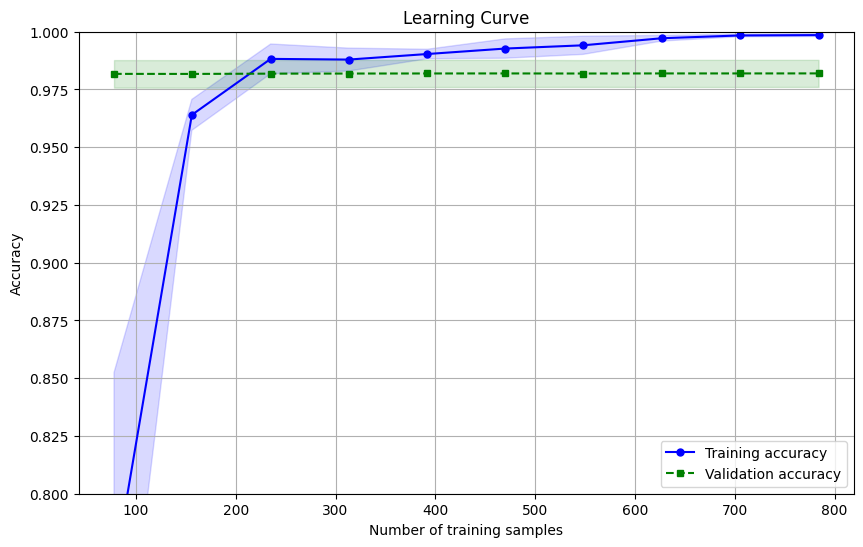

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.0])
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

# Пример использования
plot_learning_curve(best_model_lr, X_train, y_train)


In [ ]:

Выводы:

В процессе анализа и моделирования оценки активов были использованы различные методы машинного обучения, такие как линейная регрессия, решающие деревья, случайный лес, градиентный бустинг и метод опорных векторов.
Каждая модель была обучена и протестирована на тестовом наборе данных, чтобы оценить их производительность и точность предсказаний.
После оценки моделей были сравнены их результаты с помощью различных метрик, таких как среднеквадратическая ошибка (MSE), средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).
Наилучшие результаты показали линейная модель, демонстрируя высокую точность и низкие показатели ошибок на тестовых данных.

Перспективы:

Дальнейшее исследование может включать в себя использование других методов машинного обучения, а также глубокого обучения, чтобы улучшить точность предсказаний.
Можно также исследовать влияние дополнительных признаков на предсказание оценки активов, таких как новостные данные, экономические показатели или данные о рыночной волатильности.
Важно также провести более широкое сравнение моделей с существующими аналогичными решениями и проверить их применимость на реальных финансовых рынках.
Для улучшения интерпретируемости моделей можно провести анализ важности признаков и выявить ключевые факторы, влияющие на оценку активов.
Таким образом, дальнейшие исследования в этой области могут привести к разработке более точных и надежных моделей оценки активов, что имеет большое значение для инвестиционных решений и управления портфелем.